# 1D Spinodal Decomposition via the Cahn–Hilliard Equation

This notebook explores nonlinear spinodal decomposition in one spatial dimension using the Cahn–Hilliard equation:

∂φ/∂t = M ∇² ( f′(φ) − κ ∇²φ )

where:

* φ(x, t) is an order parameter,
* f(φ) = 1/4 (φ² − 1)² is a double-well potential,
* κ > 0 is the gradient energy coefficient,
* M is a mobility parameter.

This notebook simulates the nonlinear PDE using a finite-difference scheme with periodic boundary conditions and visualizes phase separation dynamics.



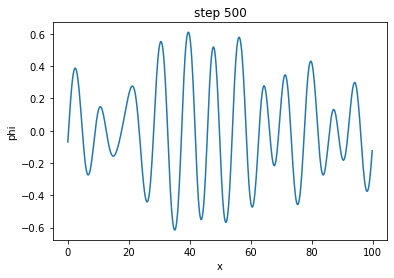

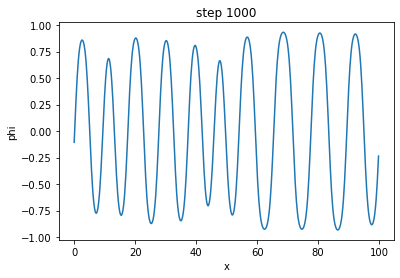

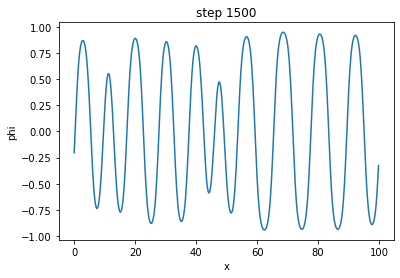

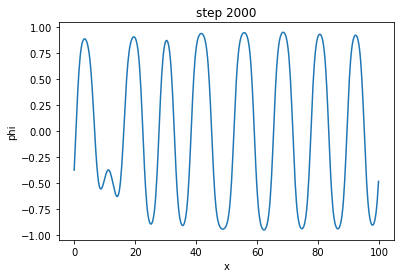

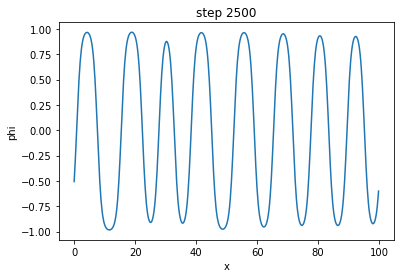

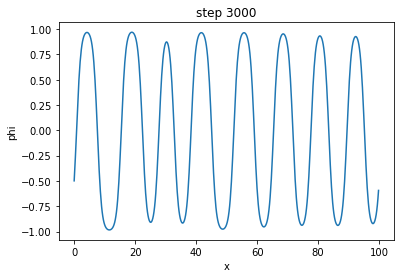

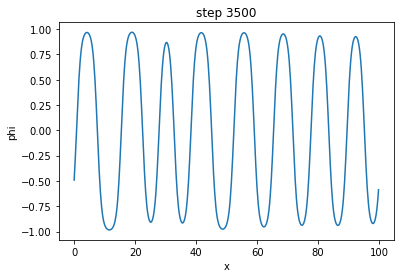

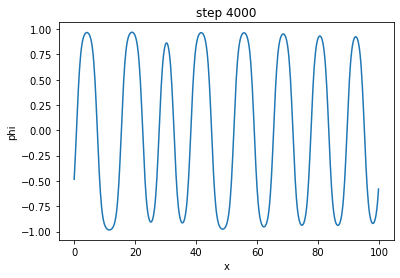

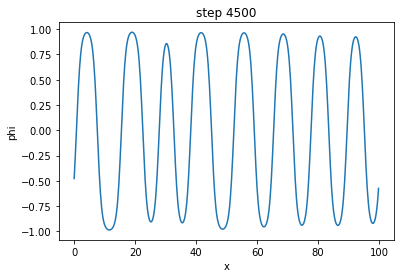

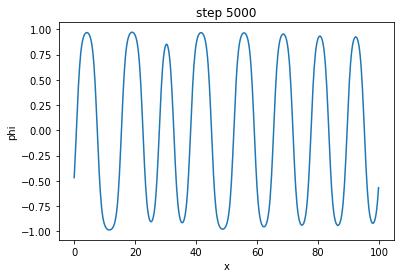

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Spatial grid
N = 512
L = 100.0
dx = L / N
x = np.linspace(0, L, N, endpoint=False)

# Time parameters
dt = 0.05          # can be much larger than explicit Euler
steps = 5000
plot_every = 500

# Model parameters
kappa = 1.0
M = 1.0

# Initial condition: small random perturbation around zero
np.random.seed(0)
phi = 0.01 * np.random.randn(N)

# Wavenumbers for FFT (periodic)
k = 2.0 * np.pi * np.fft.fftfreq(N, d=dx)
k2 = k**2
k4 = k2**2

def fprime(u):
    # f(u) = 1/4 (u^2 - 1)^2  => f'(u) = u^3 - u
    return u**3 - u

# Semi-implicit update:
# φ_t = M ∂xx( f'(φ) - κ ∂xx φ )
# In Fourier:  φ̂_{n+1} = [ φ̂_n - dt M k^2  ̂{f'(φ_n)} ] / [ 1 + dt M κ k^4 ]
den = 1.0 + dt * M * kappa * k4

for step in range(steps):
    fp = fprime(phi)
    phi_hat = np.fft.fft(phi)
    fp_hat = np.fft.fft(fp)

    phi_hat_new = (phi_hat - dt * M * k2 * fp_hat) / den
    phi = np.real(np.fft.ifft(phi_hat_new))

    if (step + 1) % plot_every == 0:
        plt.figure()
        plt.plot(x, phi)
        plt.title(f"step {step+1}")
        plt.xlabel("x")
        plt.ylabel("phi")
        plt.show()


## Final State Visualization

Below we plot the order parameter after nonlinear evolution.


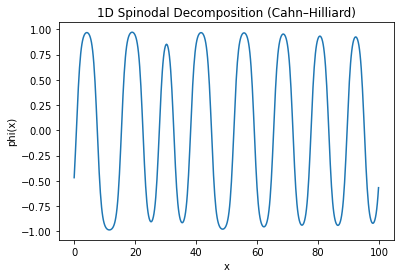

In [3]:

plt.figure()
plt.plot(x, phi)
plt.xlabel("x")
plt.ylabel("phi(x)")
plt.title("1D Spinodal Decomposition (Cahn–Hilliard)")
plt.show()


## Energy Functional

We compute the total free energy:

\[
F = \int \left( \frac{1}{4}(\phi^2 - 1)^2 + \frac{\kappa}{2} |\nabla \phi|^2 \right) dx
\]

This quantity should decrease over time for stable integration.


In [4]:

def total_energy(phi):
    grad_phi = (np.roll(phi, -1) - np.roll(phi, 1)) / (2*dx)
    density = 0.25*(phi**2 - 1)**2 + 0.5*kappa*grad_phi**2
    return np.sum(density)*dx

energy = total_energy(phi)
print("Final total energy:", energy)


Final total energy: 14.99836251271795


This notebook provides a nonlinear complement to linear instability analysis. The early-time exponential growth of unstable modes transitions into domain coarsening and interface formation at late times.
